In [9]:
import numpy as np
import pandas as pd

In [63]:
# SENTIMENTAL ANALYSIS FOR IMDB_DATA SET predicting it for new 2023 movies

In [10]:
data = pd.read_csv ("/content/IMDB Dataset.csv")

In [11]:
# Text normalization

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd 
import nltk
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelBinarizer
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from wordcloud import wordcloud, STOPWORDS
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize, sent_tokenize

In [13]:
import spacy
import re, string, unicodedata
from nltk.tokenize.toktok import ToktokTokenizer
from nltk.stem import LancasterStemmer, WordNetLemmatizer
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from textblob import TextBlob
from textblob import Word
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from bs4 import BeautifulSoup

/usr/local/lib/python3.9/dist-packages/torch/cuda/__init__.py:497: UserWarning: Can't initialize NVML
  warnings.warn("Can't initialize NVML")


In [14]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [15]:
# Tokenization

In [16]:
tokenizer = ToktokTokenizer()

In [17]:
stop_words = nltk.corpus.stopwords.words('english')

In [18]:
# beautiful soup for data scrapping
def noise_removal(text):
  soup = BeautifulSoup(text, 'html.parser')
  text = soup.get_text()
  text = re.sub('\[[^]]*\]', '', text)
  return text

In [19]:
#  applying the defineed function above which contains the special characters and the 
#  set of htmml tags taht actuallly are unwanted so we need to pre-process it.



In [20]:
# using apply function

In [21]:
data['review']=data['review'].apply(noise_removal)

<ipython-input-18-52da0e36780e>:3: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  soup = BeautifulSoup(text, 'html.parser')


In [22]:
data.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. The filming tec...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [23]:
# Stemming

In [24]:
def stemming(text):
  stem = nltk.porter.PorterStemmer()
  text = ' '.join([stem.stem(word) for word in text.split()]) 
  return text

In [25]:
# apply function

In [26]:
data['review'] = data['review'].apply(stemming)

In [27]:
data.head()

,review,sentiment
0,one of the other review ha mention that after ...,positive
1,a wonder littl production. the film techniqu i...,positive
2,i thought thi wa a wonder way to spend time on...,positive
3,basic there' a famili where a littl boy (jake)...,negative
4,"petter mattei' ""love in the time of money"" is ...",positive


In [28]:
# Removing stop words

In [29]:
def removing_stopwords(text, is_lower =False):
  tokenizer = ToktokTokenizer()
  tokens = tokenizer.tokenize(text)
  tokens = [i.strip() for i in tokens]

  if is_lower:
    filter_tokens = [i for i in tokens if i not in stop_words]
  else:
    filter_tokens = [i for i in tokens if i.lower() not in stop_words]
  filtered_texts = ' '.join(filter_tokens)
  return filtered_texts

In [30]:
#  apply

In [31]:
data['review'] = data['review'].apply(removing_stopwords)

In [32]:
data.head()

,review,sentiment
0,one review ha mention watch 1 oz episod ' hook...,positive
1,wonder littl production. film techniqu veri un...,positive
2,thought thi wa wonder way spend time hot summe...,positive
3,basic ' famili littl boy ( jake ) think ' zomb...,negative
4,"petter mattei ' "" love time money "" visual stu...",positive


In [33]:
# Machine learning technique

In [34]:
# training and testing data

In [35]:
train = data.review[:40000]
test = data.review[40000:]

In [36]:
# BAG OF WORDS

In [37]:
#  countvectoriser for bag off words

In [38]:
cv = CountVectorizer(min_df =0, max_df =1, binary = False, ngram_range=(1,3))
# transoform train reviews
cv_train = cv.fit_transform(train)
#  transform test reviews
cv_test = cv.fit_transform(test)

In [39]:
#  data shape

print('Bag of words for train', cv_train.shape)
print('Bag of words for test', cv_test.shape)

Bag of words for train (40000, 6369597)
Bag of words for test (10000, 1875663)


In [40]:
# TFIDF

In [41]:
# Tfid vectorizer
tf = TfidfVectorizer(min_df =0, max_df =1, use_idf =True, ngram_range=(1,3))
tf_train = tf.fit_transform(train)
tf_test =tf.transform(test)
print('Tifdf_train', tf_train.shape)
print('Tifdf_test', tf_test.shape)

Tifdf_train (40000, 6369597)
Tifdf_test (10000, 6369597)


In [42]:
# Label encoding 

In [43]:
# label encoding the sentiment data
label = LabelBinarizer()
# transformed sentiment data
sentiment_data = label.fit_transform(data['sentiment'])
print(sentiment_data.shape)

(50000, 1)


In [44]:
sentiment_data

array([[1],
       [1],
       [1],
       ...,
       [0],
       [0],
       [0]])

In [45]:
train_sm_data = data.sentiment[:40000]
test_sm_data = data.sentiment[40000:]

In [46]:
# Training Model 

In [47]:
from sklearn.naive_bayes import MultinomialNB

In [48]:
nb = MultinomialNB()

In [49]:
model = nb.fit(tf_train, train_sm_data)

In [50]:
y_predict = model.predict(tf_test)

In [55]:
from sklearn.metrics import confusion_matrix, classification_report 
matrix = confusion_matrix(test_sm_data, y_predict)
print(matrix)

[[3788 1205]
 [1262 3745]]


<Axes: >

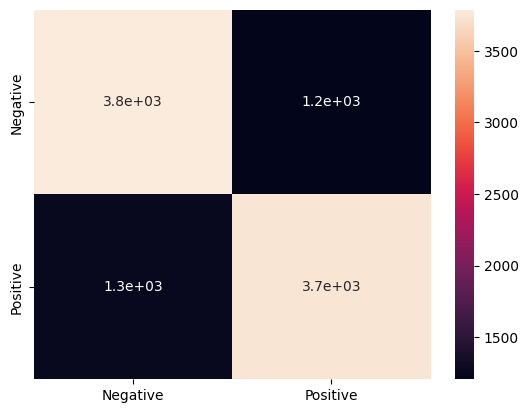

In [54]:
# heat map plot
sns.heatmap(matrix, annot=True, xticklabels=['Negative','Positive'], yticklabels=['Negative','Positive'])

In [56]:
print(classification_report(test_sm_data, y_predict))

              precision    recall  f1-score   support

    negative       0.75      0.76      0.75      4993
    positive       0.76      0.75      0.75      5007

    accuracy                           0.75     10000
   macro avg       0.75      0.75      0.75     10000
weighted avg       0.75      0.75      0.75     10000



In [62]:
# Testing the model 
# for new movie DASARA 2023 telugu

In [64]:
review = [
    "Dasara is an emotional rollercoaster with a ting on adrenaline and ton of extraordinary acting. Amazing performance by Nani and Keerthi. Fantastic cinematography and realistic score. Director Sreekanth proved a story from the heart can be commercial without adding unnecessary comedy or item songs and silly cliches. Nani's choice of movies is always unique and will never miss on emotional part of a story. He is BANG ON this time with his choice. It is dark and as close as it can get to the reality as the production design needs a special mention. Overall it is worth a watch in theaters. Tamil audience and Hindi audience may connect more",
    """The movie is impressive. All characters are penned as multidimentional in all its shades. Even the villains are shown to have some attatchments, love and vulnerabilities and the hero, "The Protector", can act as a "villain" when needed.

The action is great, the dialogues, the script... all is perfect.

It's a very realistic and profound approach at such horrific and inhuman practise.

What Bhoomi said in some parts of the movie made my eyes wet... such hearth wrenching feelings, the director could perfectly evoke very intense emotions all throughout the movie. The helpfulness, the bewilderment at how all the corrupt system worked, the anger, the good will to make things better, betrayals... Seems so so real.

Kudos to the whole crew ot this wonderful movie. It was really an experience not only a movie to pass time!!!!!""",
"""The first single shot is more than enough for this masterpiece that gives u a promise of an national or Oscar-worthy material,the detailing in every frame shows the behind on-screen craftsman vetrimaaran undoubtedly the legend of Tamil cinema this flick ranks next to "VISARANAI'' in my list of his filmography...He is so adamant and dared to expose such brutality and injustice done to the set of society people...able to bring out such a painful movie clear from a censor is a monstrous task....theirs gonna be a lot of goose bumps moments in the later upcoming part... Soori is the right choice has lived up to the role that u can't think of others to fit into shoes...take a bow to his hard work... Vjs has a lot of work to do only on second part but his entry will sure raise the standard of tamil cinema down Bollywood and will be a tALK OF THE SOCIAL MEDIA in the days to come.... In one word speechless."""

]

In [65]:
# Transform
x_test = tf.transform(review)

In [67]:
y_predict = model.predict(x_test)
y_predict
for i in y_predict:
  if y_predict==0:
    print('Negative')
  else:
    print('Positive')

Positive
Positive
Positive


<ipython-input-67-82bd3ff41fe7>:4: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if y_predict==0:
